# Visualization of Data

## Instructions

### Visualization of the german credit data
You need to **work collaboratively** to finish this task. The objective is
- To gain insights from the data via visualization and
- Identify groups of good credit risk and bad credit risk (i.e. good loan takers and bad loan takers).

This is the continuation of the previous task. You can find the data `german_credit_data.csv` saved under the [data](../data) folder.<br>
NOTE: **You can check the reference website**    

You already answered the questions in the previous task. Now we want to **visualize the finding below**.

- What are mean age, mean credit amount, and duration?
- What are the major three purpose of loan?
- What is the majoriry loan taker? Male of female?<br>

In order to gain the insights required, you may ask youself<br>
For both good loan and bad loan takers:
- What is the distrubition of purpose of loan?
- What is the distribution of age?
- What is the distribution of and amount of loan?
- Is there any correlation between the purpose of loan and gender?
- Is there any correlation between the purpose of loan and age group?
- ...etc.

You can think of any other method to analyse the data. As long as you can visualize it and help to gain insights on the good and bad loan takers.

Note:
- You are **ALLOWED** to import other library or package
- You can write you own functions
- Your answers should be readable with approprate comments
- You can refer to [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you are not familar with Markdown

### Reference
This dataset was sourced from Kaggle: https://www.kaggle.com/uciml/german-credit

The original source is: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

## Import libraries 

In [3]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set_style('whitegrid')
seaborn.set(font_scale=1.2)

## Please perform your tasks below and answer the questions

In [4]:
german_credit_data = pd.read_csv('../data/german_credit_data.csv')

### 1. Distribution of Credit amount; Age; Loan duration; Loan purpose; Saving accounts; Checking account

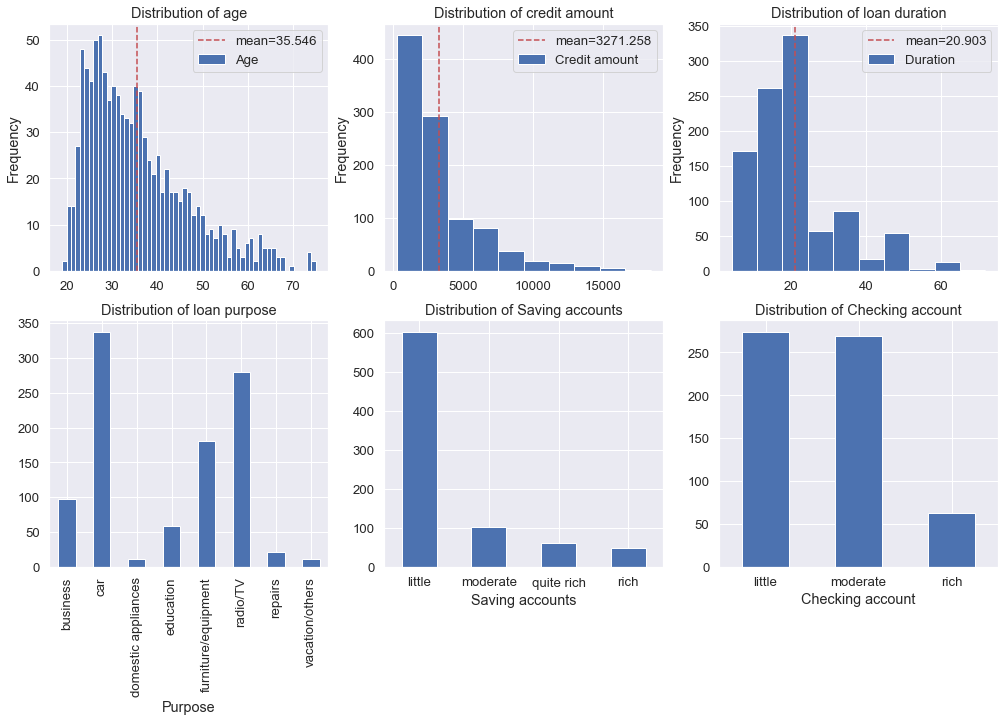

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(17,10))

# Distribution of age
german_credit_data['Age'].plot(kind='hist', ax=axes[0,0], bins=np.max(german_credit_data['Age'])+1-np.min(german_credit_data['Age']), title='Distribution of age')
# get the mean of age
mean = german_credit_data['Age'].mean()
ax00=axes[0,0]
# plot the mean of age
ax00.axvline(mean,color='r', linestyle='--', label='mean='+str(mean))
ax00.legend()

# Distribution of credit amount
german_credit_data['Credit amount'].plot(kind='hist', ax=axes[0,1], title='Distribution of credit amount')
# get the mean of credit amount
mean = german_credit_data['Credit amount'].mean()
ax01=axes[0,1]
# plot the mean of credit amount
ax01.axvline(mean,color='r', linestyle='--', label='mean='+str(mean))
ax01.legend()

# Distribution of loan duration
german_credit_data['Duration'].plot(kind='hist', ax=axes[0,2], title='Distribution of loan duration')
# get the mean of loan duration
mean = german_credit_data['Duration'].mean()
ax02=axes[0,2]
# plot the mean of loan duration
ax02.axvline(mean,color='r', linestyle='--', label='mean='+str(mean))
ax02.legend()


# number of people for each purpose
purpose = german_credit_data[['Purpose', 'Unnamed: 0']].groupby('Purpose').count()
# Distribution of loan purpose
purpose.plot(kind='bar', ax=axes[1,0], title='Distribution of loan purpose', legend=False)

# number of people for each Saving accounts
saving  = german_credit_data[['Saving accounts', 'Unnamed: 0']].groupby('Saving accounts').count()
# Distribution of Saving accounts
saving.plot(kind='bar', ax=axes[1,1], title='Distribution of Saving accounts', rot=0, legend=False)

# number of people for each Checking account
checking  = german_credit_data[['Checking account', 'Unnamed: 0']].groupby('Checking account').count()
# Distribution of Checking account
checking.plot(kind='bar', ax=axes[1,2], title='Distribution of Checking account', rot=0, legend=False)

Analysis: From the Fig 'Distribution of loan purpose', the major three purpose of loan are car, radio/TV, furniture/equipment.

### 2.1. Correlation between loan purpose and age

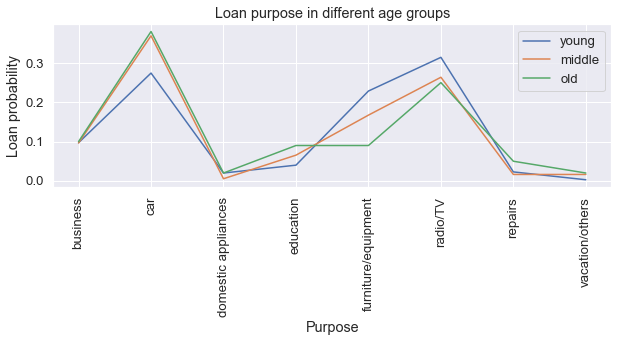

In [4]:
# seperate dataset to three age groups
sort_age = german_credit_data.sort_values(['Age'])
age_young = sort_age.iloc[0:350,:]
age_middle = sort_age.iloc[350:900,:]
age_old = sort_age.iloc[900:,:]
# for each group, count loan people number by each purpose, and divide its total number, to get the rate of this group willing to loan for each purpose
purpose_of_young = age_young[['Purpose', 'Unnamed: 0']].groupby(['Purpose']).count()/350
purpose_of_middle = age_middle[['Purpose', 'Unnamed: 0']].groupby(['Purpose']).count()/550
purpose_of_old = age_old[['Purpose', 'Unnamed: 0']].groupby(['Purpose']).count()/100

plt.figure(figsize=(10,3))
plt.title('Loan purpose in different age groups')
plt.plot(purpose_of_young, label='young')
plt.plot(purpose_of_middle, label='middle')
plt.plot(purpose_of_old, label='old')
plt.xticks(rotation=90)
plt.ylabel('Loan probability')
plt.xlabel('Purpose')
plt.legend()
plt.show()

Analysis:

Middle-aged people and old people have similar purpose except furniture/equipment, less old people will loan for that.

Less yong people will loan for car, but they are more likely to loan for furniture/equipment and radio/TV.

### 2.2 Correlation between loan purpose and gender

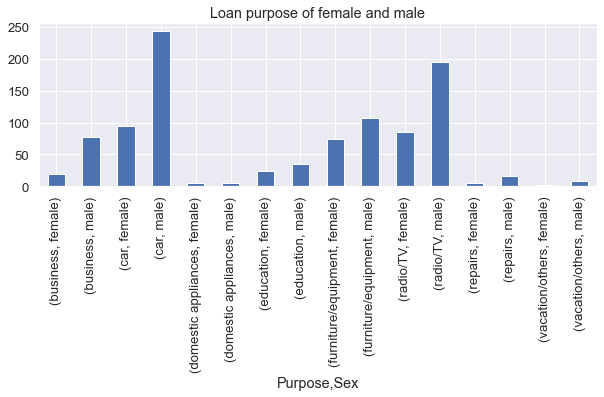

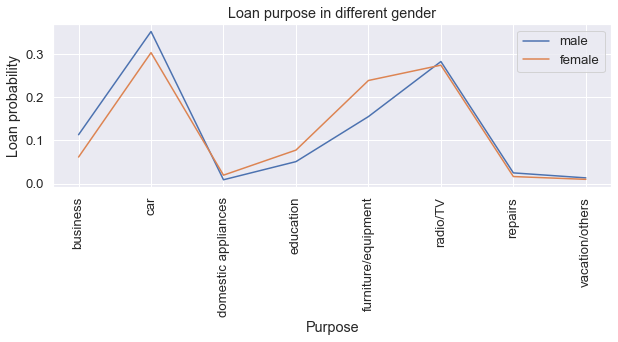

In [5]:
# group people by purpose then by sex
purpose_vs_sex = german_credit_data[['Purpose', 'Sex', 'Unnamed: 0']].groupby(['Purpose', 'Sex']).count()
purpose_vs_sex.plot(kind='bar', figsize=(10,3), legend=False, title='Loan purpose of female and male')

# split dataset to male dataset and female dataset
male = german_credit_data[ german_credit_data['Sex'] == 'male' ]
female = german_credit_data[ german_credit_data['Sex'] == 'female' ]
# count loan purpose of different gender, and normalized
Purpose_of_male = male[['Purpose', 'Unnamed: 0']].groupby(['Purpose']).count()/len(male)
Purpose_of_female = female[['Purpose', 'Unnamed: 0']].groupby(['Purpose']).count()/len(female)

plt.figure(figsize=(10,3))
plt.title('Loan purpose in different gender')
plt.plot(Purpose_of_male, label='male')
plt.plot(Purpose_of_female, label='female')
plt.xticks(rotation=90)
plt.ylabel('Loan probability')
plt.xlabel('Purpose')
plt.legend()
plt.show()

Analysis:  

Male is the majoriry loan taker (from Fig.1).

For male: top three loan purpose are car and radio/TV and furniture/equipment.

For female: its same, but female will loan more for furniture/equipment.

### 3. Correlation of age
#### Fig1. correlation between saving accounts and age
#### Fig2. correlation between Credit amount and age

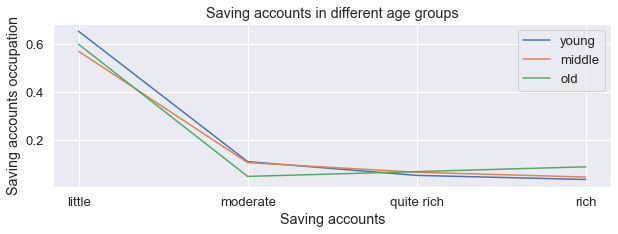

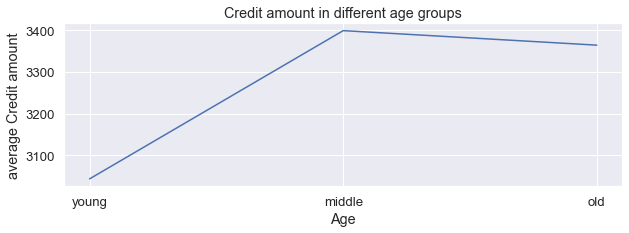

In [6]:
# for each group, count loan people number by each saving accounts type, and divide its total number, to get this type saving account's occupation of this group 
Saving_accounts_of_young = age_young[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/350
Saving_accounts_of_middle = age_middle[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/550
Saving_accounts_of_old = age_old[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/100
# for each group, count loan people number by each saving accounts type, and divide its total number, to get this type saving account's occupation of this group 
Credit_amount_of_young = age_young['Credit amount'].sum()/350
Credit_amount_of_middle = age_middle['Credit amount'].sum()/550
Credit_amount_of_old = age_old['Credit amount'].sum()/100

plt.figure(figsize=(10,3))
plt.title('Saving accounts in different age groups')
plt.plot(Saving_accounts_of_young, label='young')
plt.plot(Saving_accounts_of_middle, label='middle')
plt.plot(Saving_accounts_of_old, label='old')
plt.ylabel('Saving accounts occupation')
plt.xlabel('Saving accounts')
plt.legend()
plt.show()
plt.figure(figsize=(10,3))
plt.title('Credit amount in different age groups')
plt.plot(['young','middle','old'], [Credit_amount_of_young, Credit_amount_of_middle, Credit_amount_of_old])
plt.ylabel('average Credit amount')
plt.xlabel('Age')
plt.show()

Analysis: Old people is richer, may has good credit risk. Young people is poor, but will loan less money.

### 4. Correlation of job
#### Fig1. correlation between saving accounts and job
#### Fig2. correlation between house and job

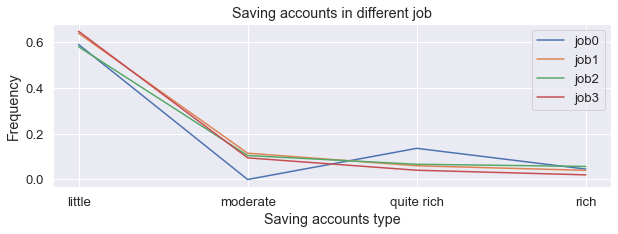

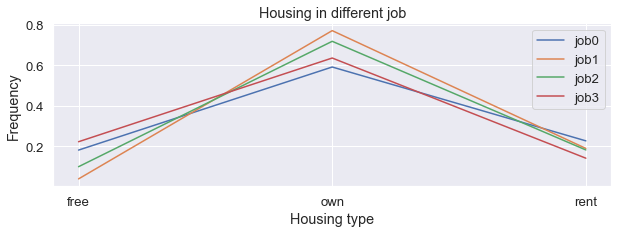

In [7]:
# split dataset to 4 dataset according to Job type
job0 = german_credit_data[ german_credit_data['Job'] == 0 ]
job1 = german_credit_data[ german_credit_data['Job'] == 1 ]
job2 = german_credit_data[ german_credit_data['Job'] == 2 ]
job3 = german_credit_data[ german_credit_data['Job'] == 3 ]

# count Saving accounts types of different job, and normalized
saving_accounts_of_job0 = job0[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/len(job0)
saving_accounts_of_job1 = job1[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/len(job1)
saving_accounts_of_job2 = job2[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/len(job2)
saving_accounts_of_job3 = job3[['Saving accounts', 'Unnamed: 0']].groupby(['Saving accounts']).count()/len(job3)
# saving_accounts_of_job0 has no moderate saving account, thus set it to 0
saving_accounts_of_job0.loc['moderate']=0
saving_accounts_of_job0['order']=[1,3,4,2]
saving_accounts_of_job0 = saving_accounts_of_job0.sort_values(by='order')
del saving_accounts_of_job0['order']

# count house type of different job, and normalized
Housing_of_job0 = job0[['Housing', 'Unnamed: 0']].groupby(['Housing']).count()/len(job0)
Housing_of_job1 = job1[['Housing', 'Unnamed: 0']].groupby(['Housing']).count()/len(job1)
Housing_of_job2 = job2[['Housing', 'Unnamed: 0']].groupby(['Housing']).count()/len(job2)
Housing_of_job3 = job3[['Housing', 'Unnamed: 0']].groupby(['Housing']).count()/len(job3)

plt.figure(figsize=(10,3))
plt.title('Saving accounts in different job')
plt.plot(saving_accounts_of_job0, label='job0')
plt.plot(saving_accounts_of_job1, label='job1')
plt.plot(saving_accounts_of_job2, label='job2')
plt.plot(saving_accounts_of_job3, label='job3')
plt.ylabel('Frequency')
plt.xlabel('Saving accounts type')
plt.legend()
plt.show()
plt.figure(figsize=(10,3))
plt.title('Housing in different job')
plt.plot(Housing_of_job0, label='job0')
plt.plot(Housing_of_job1, label='job1')
plt.plot(Housing_of_job2, label='job2')
plt.plot(Housing_of_job3, label='job3')
plt.ylabel('Frequency')
plt.xlabel('Housing type')
plt.legend()
plt.show()

Analysis:

For saving accounts, job3 and job1 are poorer than other 2 jobs, thus may have bad credit risk.

For Housing type, job3 has more free and rent housing, less own housing, this is untable, thus may has bad credit risk. 

So job2 may has good credit risk while job3 may has bad credit risk.